In [1]:
import pandas as pd

stocks_df = pd.read_csv('PopularStockSymbols.csv')

In [2]:
stocks_df

,Symbol,Name
0,AAL,American Airlines
1,AAPL,Apple
2,ABNB,Airbnb
3,ACB,Aurora Cannabis
4,AMD,Advanced Micro Devices
5,AMZN,Amazon
6,AN,AutoNation
7,APHA,Aphria
8,BA,Boeing
9,BABA,Alibaba Group


In [3]:
symbols_df = stocks_df.set_index('Symbol')

In [4]:
symbols_df

,Name
Symbol,
AAL,American Airlines
AAPL,Apple
ABNB,Airbnb
ACB,Aurora Cannabis
AMD,Advanced Micro Devices
AMZN,Amazon
AN,AutoNation
APHA,Aphria
BA,Boeing


In [6]:
# !pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 20.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 16.9 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-cp313-cp313-macosx_14_0_arm64.whl size=283910 sha256=604c8cd3195ddc22fa0a179014937c5c3fa56932e020b00acfa4017b66ad8ab4
  Stored in directory: /Users/jason/Library/Caches/pip/wheels/91/08/75/7ec051c4c2b139cc4aa3a4ae6059d80900c301473b215aad59
Successfully built peewee
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [yfinance]━━━━━━━━━ 4/6 [curl_cffi]


In [10]:
import yfinance as yf

def YesterdayChangeP(v):
    try:
        YFSTK = yf.Ticker(v)
        stk_df = YFSTK.history(period="2d")
        if stk_df.empty or len(stk_df) < 1:
            return None  # or float('nan')
        return (stk_df.iloc[-1].Close - stk_df.iloc[-1].Open) / stk_df.iloc[-1].Open * 100
    except Exception as e:
        print(f"Error fetching data for {v}: {e}")
        return None  # or float('nan')

In [11]:
stocks_df['YesterdayChange'] = stocks_df.Symbol.apply(YesterdayChangeP)

$APHA: possibly delisted; no price data found  (period=2d) (Yahoo error = "No data found, symbol may be delisted")
$FB: possibly delisted; no price data found  (period=2d) (Yahoo error = "No data found, symbol may be delisted")
$HEXO: possibly delisted; no price data found  (period=2d) (Yahoo error = "No data found, symbol may be delisted")
$NRZ: possibly delisted; no price data found  (period=2d) (Yahoo error = "No data found, symbol may be delisted")
$SAVE: possibly delisted; no price data found  (period=2d)
$SNE: possibly delisted; no price data found  (period=2d) (Yahoo error = "No data found, symbol may be delisted")
$SQ: possibly delisted; no price data found  (period=2d) (Yahoo error = "No data found, symbol may be delisted")
$TWTR: possibly delisted; no price data found  (period=2d)
$ZNGA: possibly delisted; no price data found  (period=2d) (Yahoo error = "No data found, symbol may be delisted")


In [14]:
import yfinance as yf
import pandas as pd

def LWeekChangeP(v):
    try:
        YFSTK = yf.Ticker(v)
        stk_df = YFSTK.history(period="8d")
        if stk_df.empty or len(stk_df) < 2:
            return None
        return (stk_df.iloc[-1].Close - stk_df.iloc[1].Open) / stk_df.iloc[1].Open * 100
    except Exception as e:
        print(f"Error fetching data for {v}: {e}")
        return None

In [16]:
stocks_df['LWeekChange'] = stocks_df['Symbol'].apply(LWeekChangeP)
stocks_df = stocks_df.dropna(subset=['LWeekChange']).reset_index(drop=True)

$APHA: possibly delisted; no price data found  (period=8d) (Yahoo error = "No data found, symbol may be delisted")
$FB: possibly delisted; no price data found  (period=8d) (Yahoo error = "No data found, symbol may be delisted")
$HEXO: possibly delisted; no price data found  (period=8d) (Yahoo error = "No data found, symbol may be delisted")
$NRZ: possibly delisted; no price data found  (period=8d) (Yahoo error = "No data found, symbol may be delisted")
$SAVE: possibly delisted; no price data found  (period=8d)
$SNE: possibly delisted; no price data found  (period=8d) (Yahoo error = "No data found, symbol may be delisted")
$SQ: possibly delisted; no price data found  (period=8d) (Yahoo error = "No data found, symbol may be delisted")
$TWTR: possibly delisted; no price data found  (period=8d)
$ZNGA: possibly delisted; no price data found  (period=8d) (Yahoo error = "No data found, symbol may be delisted")


In [17]:
def LMonthChangeP (v):
    YFSTK = yf.Ticker(v)
    stk_df = YFSTK.history(period="31d")
    return (stk_df.iloc[-1].Close-stk_df.iloc[1].Open)/stk_df.iloc[1].Open*100

In [18]:
stocks_df['LastMonthChange'] = stocks_df.Symbol.apply(LMonthChangeP)

In [19]:
import time
import requests
Template = 'https://finnhub.io/api/v1/stock/recommendation?symbol={}&token=bsiqli7rh5rc8orbnkqg'

def Rating (v):
    Address = (Template.format(v))
    r = requests.get(Address)
    #time.sleep(1.01)
    #print(v)
    
    if not r.json():
        return 0
    else:
        ws = pd.Series(r.json()[0])
        Total = ws.buy + ws.hold + ws.sell + ws.strongBuy + ws.strongSell
        score = (ws.buy*2 + ws.hold - ws.sell*2 + ws.strongBuy*2.5 - ws.strongSell*2.5)/Total
        return score

In [20]:
stocks_df['Rating'] = stocks_df.Symbol.apply(Rating)

In [21]:
stocks_df.Rating = stocks_df.Rating.apply(lambda v: 0 if v<0 else v)

In [22]:
stocks_df.set_index('Symbol', drop=True, inplace=True)
stocks_df.drop(columns=['Name'],inplace=True)

In [23]:
stocks_df

,YesterdayChange,LastWeekChange,LWeekChange,LastMonthChange,Rating
Symbol,,,,,
AAL,-3.105866,4.820418,4.820418,-5.821586,1.518519
AAPL,0.350016,2.448050,2.441050,-3.939549,1.614035
ABNB,-1.234939,-5.326216,-5.326216,-2.625901,1.115385
ACB,-1.362175,-33.193982,-33.217393,-21.385828,1.650000
AMD,1.092579,20.220841,20.253959,30.310227,1.794643
AMZN,-0.412833,0.648112,0.664125,1.231756,2.088608
AN,0.238768,4.550165,4.550165,6.309676,1.863636
BA,-0.706467,-0.508553,-0.508553,-0.294556,1.797297
BABA,-1.407845,0.500084,0.500084,-11.809161,2.122449


In [24]:
stocks_df.describe()

,YesterdayChange,LastWeekChange,LWeekChange,LastMonthChange,Rating
count,49.000000,49.000000,49.000000,49.000000,49.000000
mean,-0.642240,1.000697,0.937618,2.322885,1.467258
std,1.325368,7.676256,7.711139,10.749784,0.643485
min,-4.875991,-33.193982,-33.217393,-21.385828,0.000000
25%,-1.362175,-1.922967,-2.029494,-2.908518,1.352273
50%,-0.451085,0.500084,0.500084,1.176168,1.614035
75%,0.126296,4.550165,4.550165,8.111586,1.968750
max,2.247117,20.220841,20.253959,30.310227,2.178571


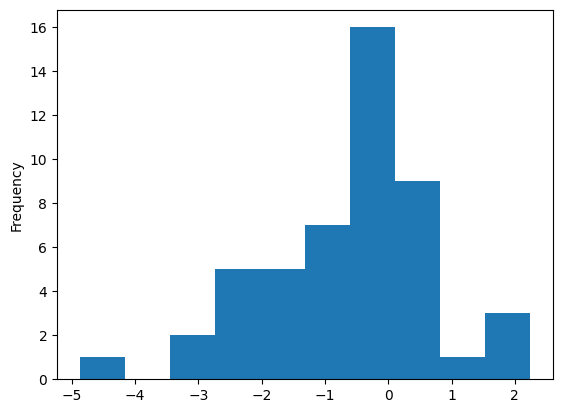

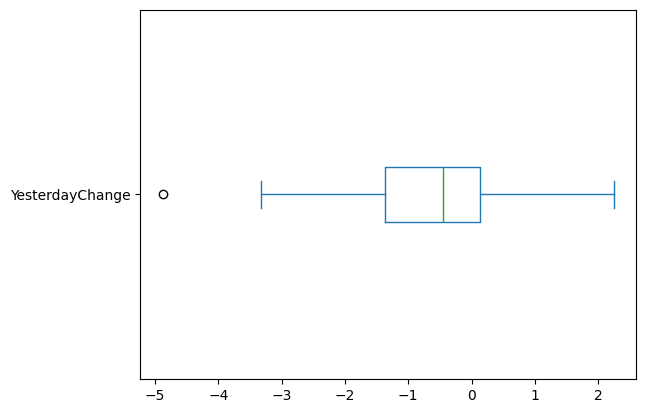

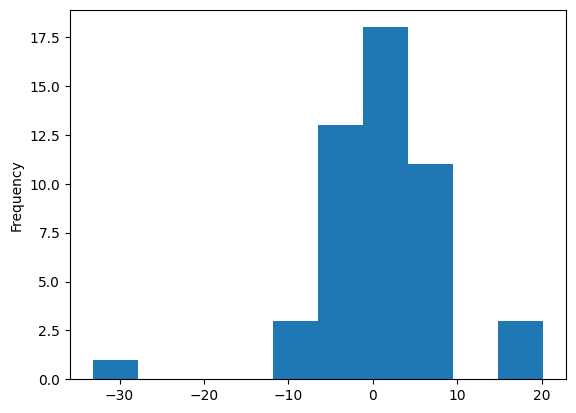

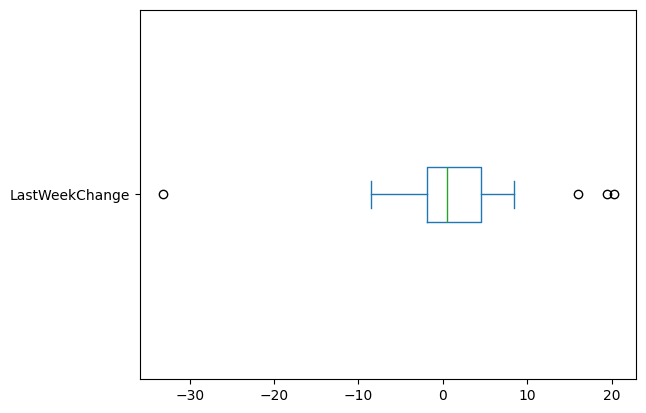

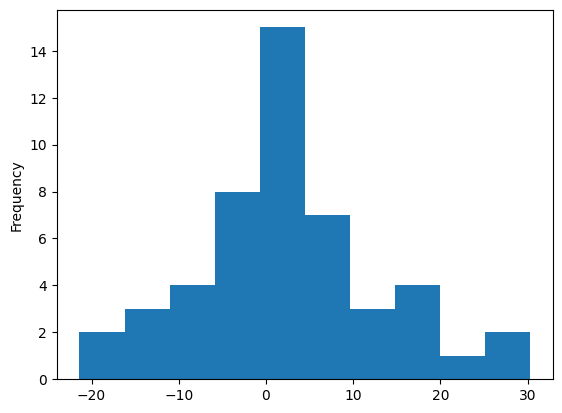

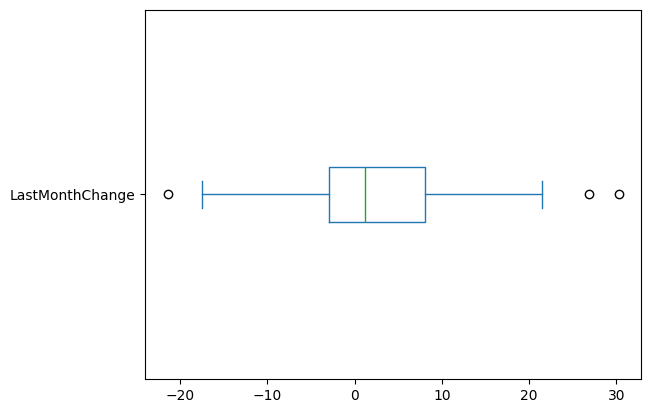

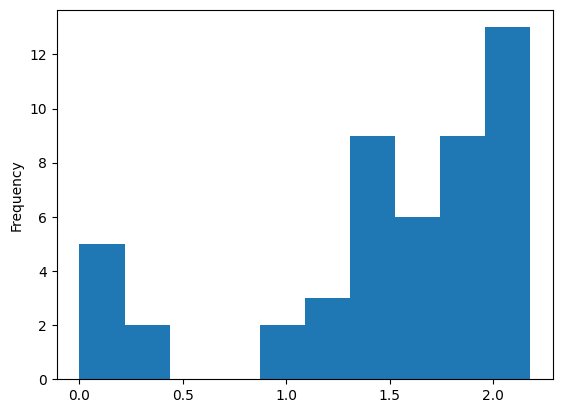

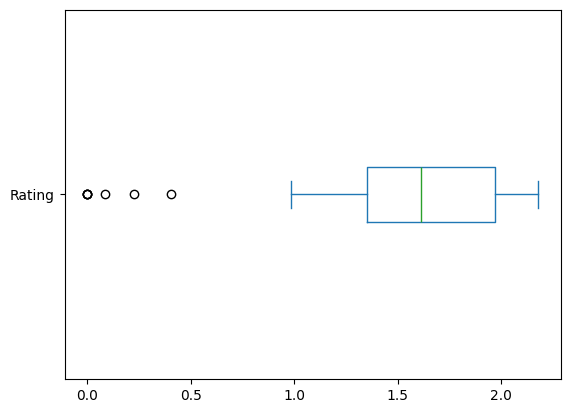

In [25]:
columns = ['YesterdayChange','LastWeekChange','LastMonthChange','Rating']
import matplotlib.pyplot as plt

for col in columns:
    stocks_df[col].plot.hist()
    plt.show()
    stocks_df[col].plot.box(vert=False)
    plt.show()

In [26]:
stocks_df_nor = (stocks_df - stocks_df.min())/(stocks_df.max() - stocks_df.min())*2-1

In [27]:
stocks_df_nor.describe()

,YesterdayChange,LastWeekChange,LWeekChange,LastMonthChange,Rating
count,49.000000,49.000000,49.000000,49.000000,49.000000
mean,0.188737,0.280344,0.277507,-0.082765,0.346991
std,0.372132,0.287420,0.288421,0.415884,0.590740
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.013404,0.170874,0.166527,-0.285156,0.241431
50%,0.242409,0.261600,0.261142,-0.127129,0.481737
75%,0.404524,0.413246,0.412628,0.141186,0.807377
max,1.000000,1.000000,1.000000,1.000000,1.000000


,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,...,R92,R93,R94,R95,R96,R97,R98,R99,Mean,Var
4,0.271467,0.271783,0.292326,0.29573,0.238893,0.288586,0.255665,0.261406,0.239626,0.294369,...,0.261406,0.238893,0.281445,0.235205,0.271783,0.292326,0.254231,0.266818,0.275392,0.00106


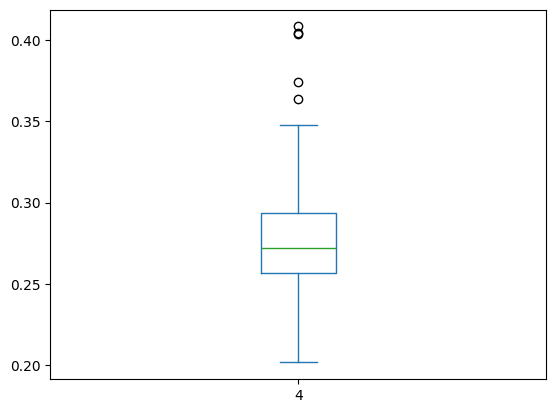

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

SIL_results = pd.DataFrame(0.0, index =[4], 
                       columns= ['R{}'.format(i) for i in range(1,100)])

Clusterings =[]

for n_cluster in SIL_results.index:
    for col in SIL_results.columns:
        algort = KMeans(n_clusters=n_cluster).fit(stocks_df_nor)
        SIL_results.at[n_cluster,col] = silhouette_score(stocks_df_nor,algort.labels_)
        Clusterings.append(algort.labels_)
        # Inertia: Sum of distances of samples to their closest cluster center

SIL_results.transpose().plot.box()

SIL_results['Mean'] = SIL_results[['R{}'.format(i) for i in range(1,15)]].mean(axis=1)
SIL_results['Var'] = SIL_results[['R{}'.format(i) for i in range(1,15)]].var(axis=1)
SIL_results

In [29]:
import numpy as np

memb = pd.Series(Clusterings[np.argmax(SIL_results)], index=stocks_df_nor.index)
memb

Symbol
AAL      2
AAPL     2
ABNB     1
ACB      3
AMD      0
AMZN     2
AN       2
BA       2
BABA     2
BB       0
CPRX     2
CRON     2
DAL      2
DIS      2
DKNG     2
ET       2
F        1
FUBO     2
GE       2
GM       2
GOOGL    2
JBLU     1
JNJ      2
KO       2
LUV      1
MGM      2
MRNA     1
MSFT     2
NFLX     2
NKE      2
NOK      2
NVDA     2
PENN     2
PFE      2
PLTR     2
PSEC     1
PYPL     2
RCL      2
SBUX     2
SIRI     1
SNAP     1
T        2
TLRY     2
TSLA     1
UAL      2
UBER     2
WMT      2
XOM      2
ZM       2
dtype: int32

In [30]:
stocks_df = stocks_df.join(pd.DataFrame(memb,columns=['Cluster']))
stocks_df

,YesterdayChange,LastWeekChange,LWeekChange,LastMonthChange,Rating,Cluster
Symbol,,,,,,
AAL,-3.105866,4.820418,4.820418,-5.821586,1.518519,2
AAPL,0.350016,2.448050,2.441050,-3.939549,1.614035,2
ABNB,-1.234939,-5.326216,-5.326216,-2.625901,1.115385,1
ACB,-1.362175,-33.193982,-33.217393,-21.385828,1.650000,3
AMD,1.092579,20.220841,20.253959,30.310227,1.794643,0
AMZN,-0.412833,0.648112,0.664125,1.231756,2.088608,2
AN,0.238768,4.550165,4.550165,6.309676,1.863636,2
BA,-0.706467,-0.508553,-0.508553,-0.294556,1.797297,2
BABA,-1.407845,0.500084,0.500084,-11.809161,2.122449,2


In [31]:
Centroids_nor = pd.DataFrame(0.0, index = ['Cluster {}'.format(i) for i in range(4)],
                        columns = stocks_df_nor.columns)

for i in range(4):
    BM = memb==i
    Centroids_nor.iloc[i] = stocks_df_nor[BM].mean(axis=0)
    
Centroids_nor

,YesterdayChange,LastWeekChange,LWeekChange,LastMonthChange,Rating
Cluster 0,0.812564,0.984960,0.984357,0.934479,-0.176230
Cluster 1,-0.138353,0.185423,0.185519,-0.307369,-0.597676
Cluster 2,0.240042,0.299950,0.296202,-0.058328,0.600523
Cluster 3,-0.013404,-1.000000,-1.000000,-1.000000,0.514754


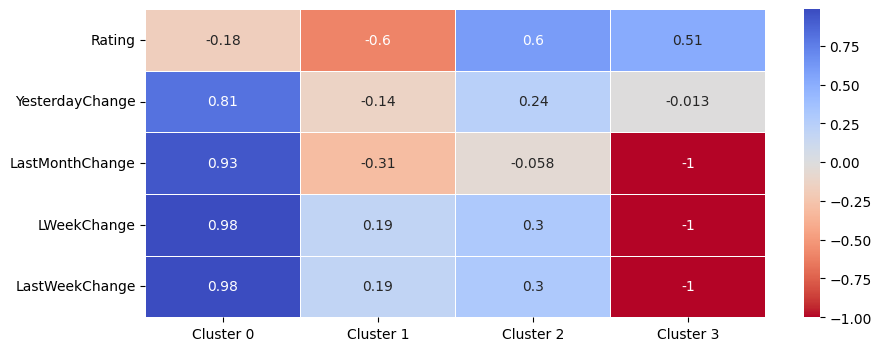

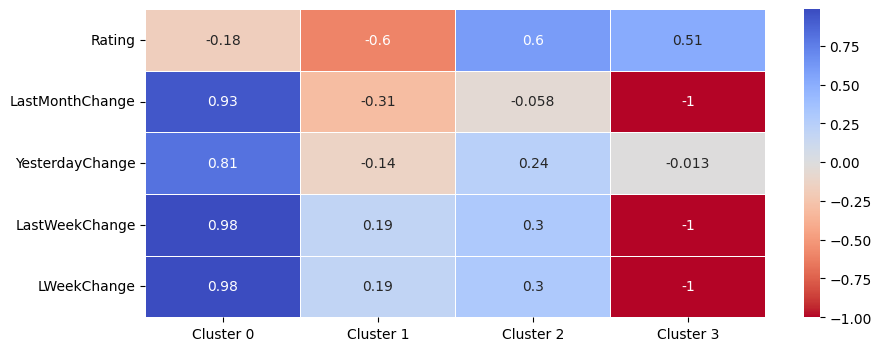

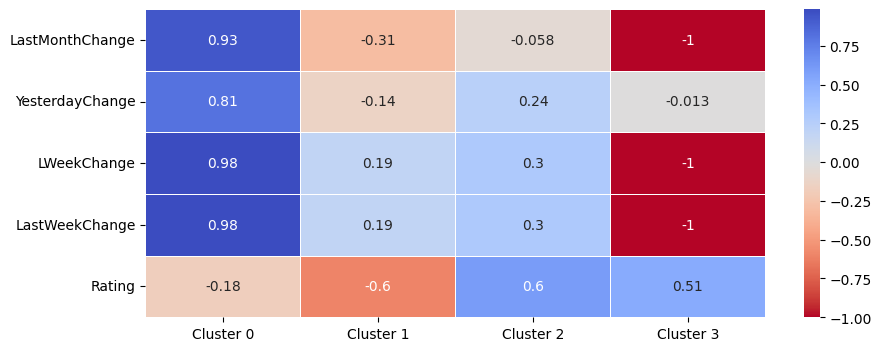

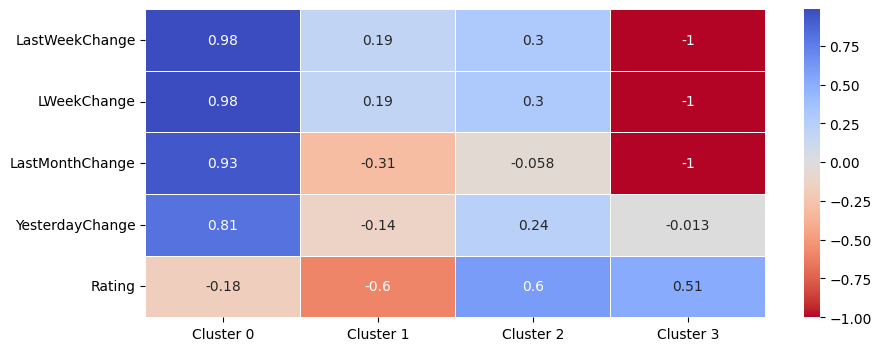

In [32]:
import seaborn as sns
for i in range(4):

    plt.figure(figsize=(10,4))
    Clust_name = 'Cluster ' + str(i)
    sns.heatmap(Centroids_nor.sort_values(Clust_name,axis=1).transpose(), linewidths=.5, annot=True, 
                cmap='coolwarm_r')
    plt.show()

In [34]:
Cluster_names = ['Low Rate Low performance','High Rate Medium Perfomrance', 'High Rate High Performance','Mixed rate and performance']

In [35]:
for clst in stocks_df.Cluster.unique():
    
    BM = stocks_df.Cluster == clst
    wdf = stocks_df[BM]
    
    print('Cluster Name: {}'.format(Cluster_names[clst]))
    print('Number of Members: {}'.format(len(wdf)))
    print(symbols_df.loc[wdf.index].Name)
    print('-----------------')
    
    

Cluster Name: High Rate High Performance
Number of Members: 37
Symbol
AAL              American Airlines
AAPL                         Apple
AMZN                        Amazon
AN                      AutoNation
BA                          Boeing
BABA                 Alibaba Group
CPRX      Catalyst Pharmaceuticals
CRON                  Cronos Group
DAL                Delta Air Lines
DIS                         Disney
DKNG                    DraftKings
ET              Energy Transfer LP
FUBO                        FuboTV
GE                General Electric
GM                  General Motors
GOOGL                     Alphabet
JNJ              Johnson & Johnson
KO                       Coca-Cola
MGM                    MGM Resorts
MSFT                     Microsoft
NFLX                       Netflix
NKE                           Nike
NOK                          Nokia
NVDA                        NVIDIA
PENN          Penn National Gaming
PFE                         Pfizer
PLTR                